In [1]:
import talib as ta
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

forex = pd.read_csv("../Data/EURUSD2014_2018.csv").set_index('date')


In [2]:
forex.head()

,open,high,low,close
date,,,,
2014-01-01 23:01:00,1.3764,1.3764,1.3761,1.3764
2014-01-01 23:02:00,1.3764,1.3764,1.3763,1.3764
2014-01-01 23:03:00,1.3763,1.3763,1.3760,1.3761
2014-01-01 23:04:00,1.3761,1.3762,1.3761,1.3762
2014-01-01 23:05:00,1.3761,1.3762,1.3761,1.3762


In [3]:
forex['SMA_20'] = ta.SMA(np.asarray(forex['close']), 20)
forex['EMA'] = ta.SMA(np.asarray(forex['close']), timeperiod = 14)

forex.tail()

,open,high,low,close,SMA_20,EMA
date,,,,,,
2018-10-31 23:55:00,1.1316,1.1316,1.1316,1.1316,1.131480,1.131514
2018-10-31 23:56:00,1.1315,1.1315,1.1315,1.1315,1.131485,1.131521
2018-10-31 23:57:00,1.1315,1.1315,1.1315,1.1315,1.131490,1.131521
2018-10-31 23:58:00,1.1316,1.1316,1.1316,1.1316,1.131500,1.131536
2018-10-31 23:59:00,1.1316,1.1316,1.1316,1.1316,1.131510,1.131550


In [4]:
forex['CDL2CROWS'] = ta.CDL2CROWS(forex['open'], forex['high'], forex['low'], forex['close'])
forex['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(forex['open'], forex['high'], forex['low'], forex['close'])
forex['CDL3INSIDE'] = ta.CDL3INSIDE(forex['open'], forex['high'], forex['low'], forex['close'])
forex['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(forex['open'], forex['high'], forex['low'], forex['close'])
forex['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(forex['open'], forex['high'], forex['low'], forex['close'])
forex['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(forex['open'], forex['high'], forex['low'], forex['close'])
forex['AVGPRICE'] = ta.AVGPRICE(forex['open'], forex['high'], forex['low'], forex['close'])
forex['BOP'] = ta.BOP(forex['open'], forex['high'], forex['low'], forex['close'])


In [5]:
forex_trunc = forex[-350:-130]

## Pre-pocessing
Using <b>my_data</b> <br>

<ul>
    <li> <b>forex['response'] = forex['open'] == forex['close'].shift(5) </b> checks if the closing price is lower than the opening price of five minutes ago </li>
    </li>
</ul>

In [20]:
forex['response'] = np.where(forex['open'] - forex['close'].shift(5) > 0.0007,1,-1)

forex['response'].value_counts()

-1    1716235
 1      38873
Name: response, dtype: int64

In [30]:
featuresList = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE','CDL3LINESTRIKE','CDL3OUTSIDE','CDL3STARSINSOUTH', 'AVGPRICE', 'BOP']
X = forex[featuresList][20:]

y = forex['response']
y = forex['response'][20:]

In [31]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [32]:
print(y_trainset.shape, X_trainset.shape)
print(y_testset.shape, X_testset.shape)

(1228561,) (1228561, 8)
(526527,) (526527, 8)


In [33]:
y_testset.value_counts()

-1    514865
 1     11662
Name: response, dtype: int64

In [34]:
forexTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
forexTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predTree = forexTree.predict(X_testset)

In [36]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.977849189120406


In [37]:
X.columns

Index(['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE',
       'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'AVGPRICE', 'BOP'],
      dtype='object')

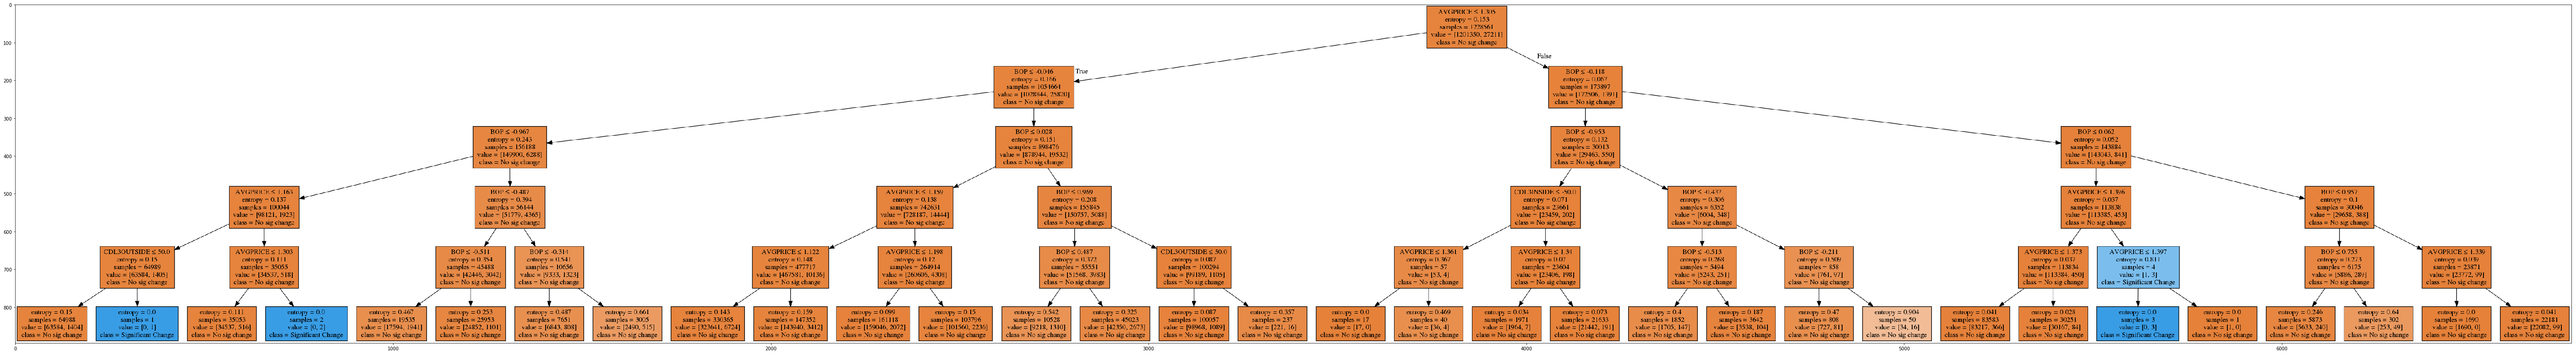

In [38]:
dot_data = StringIO()
filename = "forextree.png"
featureNames = X.columns
# targetNames = df["Hipov"].unique().tolist()
out=tree.export_graphviz(forexTree,feature_names=featureNames, out_file=dot_data, class_names= ['No sig change', 'Significant Change'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')